In [38]:
import json
!python get_benchmark_fidx.py
with open('metrics.json', 'r') as f:  metrics = json.load(f)

print(f'Number of benchmarks: {len(metrics)}')
print(f'Number of single function benchmarks: {sum([len(metrics[test]) for test in metrics])}')
for k in sorted(metrics , key=lambda x: len(metrics[x]), reverse=True):
    print(f'{k}: {len(metrics[k])}')

Enumeration of benchmarks and fidxs done.
Number of benchmarks: 27
Number of single function benchmarks: 7750
jsc: 2436
bullet: 1251
funky-kart: 945
sqlgui: 625
commanderkeen: 580
boa: 462
rfxgen: 229
rguistyler: 190
rguilayout: 186
pacalc: 176
guiicons: 167
riconpacker: 162
figma-startpage: 93
pathfinding: 57
hydro: 53
mandelbrot: 37
parquet: 37
sandspiel: 28
factorial: 15
jqkungfu: 6
ffmpeg: 6
game-of-life: 2
rtexviewer: 2
rtexpacker: 2
fib: 1
multiplyInt: 1
multiplyDouble: 1


In [9]:
!TEST_NAME=jqkungfu python run_slicedice.py

Slicedice run on all candidate benchmarks and fidx


In [7]:
# this takes upto 150
!TEST_SUBSET=True TEST_NAME=jqkungfu python run_slicedice.py

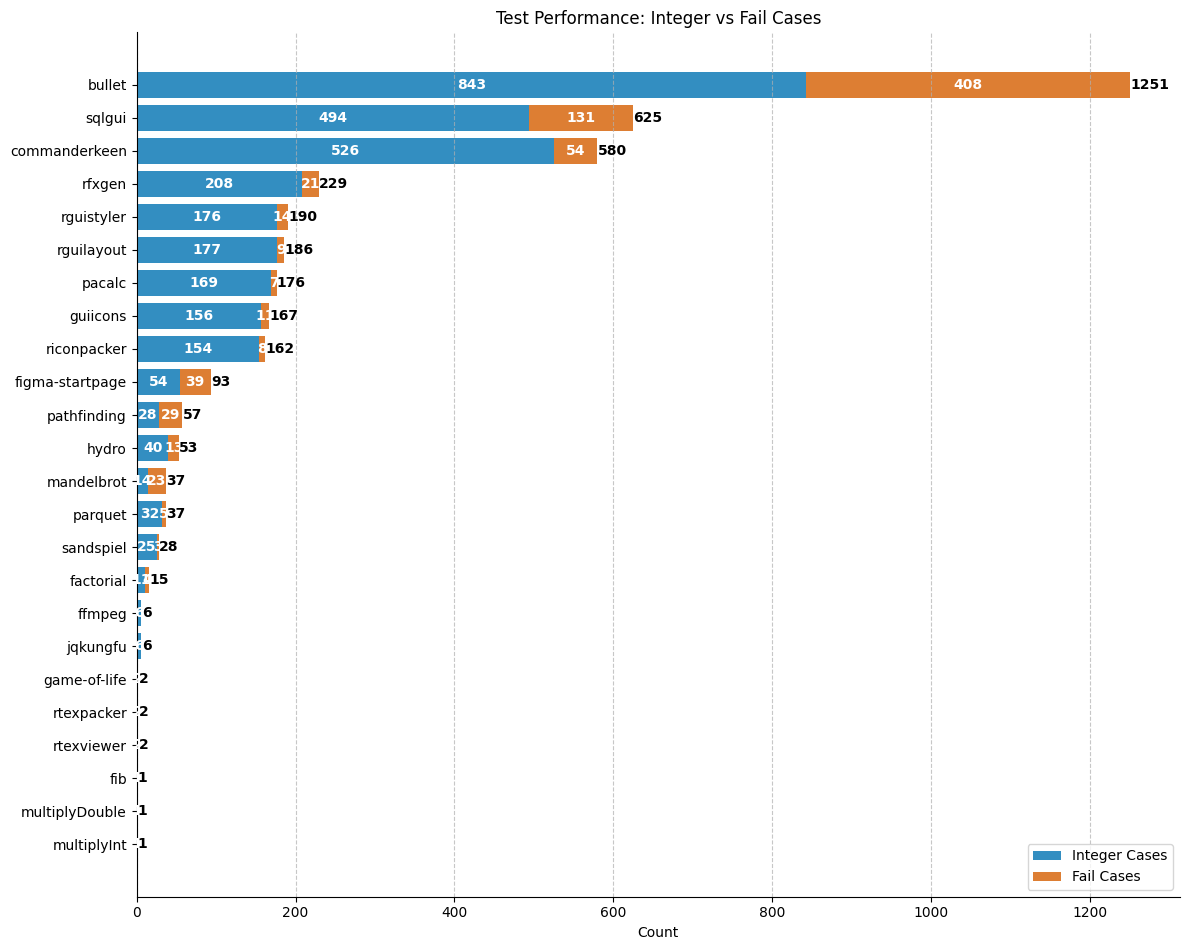

In [3]:
import matplotlib.pyplot as plt
import json

# Parse the JSON data
with open('metrics.json', 'r') as f:
    metrics = json.load(f)

# Initialize lists for storing counts
tests = []
int_counts = []
fail_counts = []

# Extract metrics for plotting
for test_name, test_data in metrics.items():
    int_count = 0
    fail_count = 0
    for item in test_data.values():
        value = item.get('wasm-r3')
        if isinstance(value, int):
            int_count += 1
        elif value == "fail":
            fail_count += 1

    if int_count > 0 or fail_count > 0:
        tests.append(test_name)
        int_counts.append(int_count)
        fail_counts.append(fail_count)

# Sort data
sorted_data = sorted(zip(tests, int_counts, fail_counts), key=lambda x: x[1] + x[2], reverse=True)
tests, int_counts, fail_counts = zip(*sorted_data)

# Define color blind-friendly colors
color_int = '#0072B2'  # Blue
color_fail = '#D55E00'  # Vermilion

# Create the plot
fig, ax = plt.subplots(figsize=(12, max(6, len(tests) * 0.4)))

# Plot horizontal bars
y_pos = range(len(tests))
bars_int = ax.barh(y_pos, int_counts, align='center', color=color_int, alpha=0.8, label='Integer Cases')
bars_fail = ax.barh(y_pos, fail_counts, align='center', color=color_fail, alpha=0.8, label='Fail Cases',
                    left=int_counts)  # This places the red bars after the blue bars

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(tests)
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Test Performance: Integer vs Fail Cases')

# Add grid lines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on the bars
for i, (bar_int, bar_fail) in enumerate(zip(bars_int, bars_fail)):
    int_width = bar_int.get_width()
    fail_width = bar_fail.get_width()
    total_width = int_width + fail_width
    
    # Label for integer cases
    if int_width > 0:
        ax.text(int_width / 2, bar_int.get_y() + bar_int.get_height()/2, f'{int_width}', 
                ha='center', va='center', fontweight='bold', color='white')
    
    # Label for fail cases
    if fail_width > 0:
        ax.text(int_width + fail_width / 2, bar_fail.get_y() + bar_fail.get_height()/2, f'{fail_width}', 
                ha='center', va='center', fontweight='bold', color='white')
    
    # Total count at the end of the bar
    ax.text(total_width + 0.5, bar_int.get_y() + bar_int.get_height()/2, f'{total_width}', 
            ha='left', va='center', fontweight='bold', color='black')

# Add a legend
ax.legend(loc='lower right')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# jsc: 2436
# funky-kart: 945
# boa: 462 --> all fail with OOM when saving benchmark